# Test méthode classique de débruitage

## Modèles basés sur la densité de probabilité

In [9]:
# Import des modules
import os
import random
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import scipy as scp
from scipy import ndimage
from scipy.stats import norm

In [10]:
# Bloc de fonctions utiles 

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Affichage histogramme d'une image
def display_histogram(image):
    plt.figure()
    plt.hist(image.flatten(), bins=256, range=(0,256), density=True, color='black', alpha=0.75)
    plt.title('Histogramme')
    plt.xlabel('Valeurs des pixels')
    plt.ylabel('Fréquence')
    plt.show()


# Importer une image en niveaux de gris
def display_image(image,title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    #plt.title(title)
    plt.axis('off')
    plt.show()

def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value


In [11]:
# Fonction de débruitage basée sur la densité de probabilité
def denoise_with_probability_density(image, sigma=20):
    # Création d'une image de sortie
    denoised_image = np.zeros(image.shape, dtype=np.float64)
    
    # Parcourir chaque pixel
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Extraire la région locale (voisinage 3x3 autour du pixel)
            local_patch = image[i-1:i+2, j-1:j+2]
            
            # Calculer la moyenne et la variance de cette région
            local_mean = np.mean(local_patch)
            
            # Estimer la probabilité de chaque pixel en fonction de la distribution normale
            probability_density = norm.pdf(local_patch, loc=local_mean, scale=sigma)
            
            # Appliquer un filtre en pondérant par la densité de probabilité
            weighted_sum = np.sum(local_patch * probability_density)
            normalization_factor = np.sum(probability_density)
            denoised_pixel = weighted_sum / normalization_factor
            
            # Attribuer la valeur débruitée au pixel central
            denoised_image[i, j] = denoised_pixel

    # Convertir l'image débruitée en uint8
    return np.clip(denoised_image, 0, 255).astype(np.uint8)

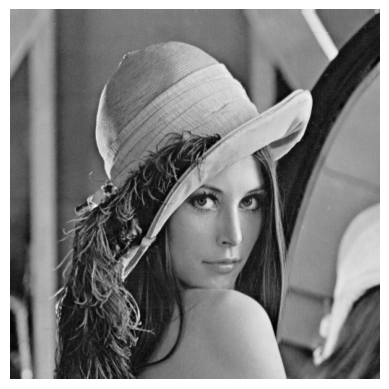

In [12]:
# Bloc de test d'affichage de l'image et de son histogramme

# Importer l'image
image = import_image('lena.pgm')
display_image(image,'Image originale')
# display_histogram(image)

[[0.71752824 0.73773805 0.85649334 ... 0.81163517 0.85659717 0.60234032]
 [0.75393535 0.68601029 0.59762074 ... 0.85668788 0.65650801 0.45277025]
 [0.85378688 0.53840735 0.76434032 ... 0.78766351 0.72357472 0.62419776]
 ...
 [0.14339297 0.13172923 0.39679038 ... 0.45897599 0.24293132 0.40886836]
 [0.18212324 0.25100845 0.2679966  ... 0.45705165 0.43741779 0.32776913]
 [0.11957767 0.24915587 0.35363104 ... 0.53578995 0.42003146 0.55344041]]


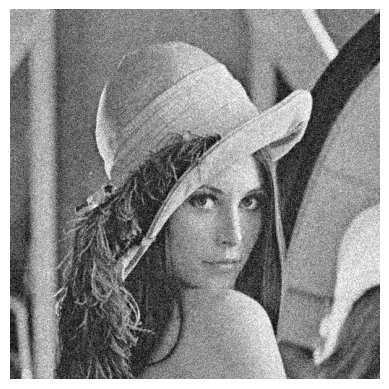

In [13]:
# Ajout de bruit à l'image
image_noised = ski.util.random_noise(image, mean=0, var=0.01)
print(image_noised)
display_image(image_noised,'Image bruitée')

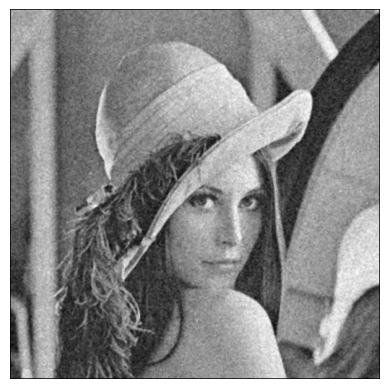

In [14]:
# Débruitage de l'image
image_noised = (image_noised * 255).astype(np.uint8)
image_denoised = denoise_with_probability_density(image_noised)
display_image(image_denoised,'Image débruitée')

In [16]:
# Test PSNR entre l'image originale et l'image débruitée
psnr_value = psnr(image, image_noised)
print('PSNR entre l\'image originale et l\'image bruitée :', psnr_value)
psnr_value = psnr(image, image_denoised)
print('PSNR entre l\'image originale et l\'image débruitée :', psnr_value)

PSNR entre l'image originale et l'image bruitée : 20.060398843428338
PSNR entre l'image originale et l'image débruitée : 24.15312975083001
